# Testing PCA model

In [58]:
# import all libraries
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pickle
import warnings
warnings.filterwarnings('ignore')

In [59]:
# load test dataset
file_obj = open('test.pkl','rb')
test = pickle.load(file_obj)

In [60]:
test.sample()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
56,14.22,1.7,2.3,16.3,118,3.2,3.0,0.26,2.03,6.38,0.94,3.31,970,1


In [61]:
# seperate input features and labels
x = test.iloc[:,0:13].values
y = test.iloc[:,13].values

In [62]:
x.shape,y.shape

((36, 13), (36,))

In [63]:
# load trainned model
file_obj = open('train.pkl','rb')
classifier = pickle.load(file_obj)
scale_obj = pickle.load(file_obj)
pca =  pickle.load(file_obj)
file_obj.close()

In [64]:
# transform x data 
x = scale_obj.transform(x)

In [65]:
# transform method returns the specified number of principal components.
x = pca.transform(x)

In [66]:
# make prediction using model
prediction = classifier.predict(x)

In [67]:
df = pd.DataFrame({'Actual': y, 'Predicted': prediction})  
df.head()

,Actual,Predicted
0,2,2
1,3,3
2,3,3
3,1,1
4,3,3


In [68]:
cf = confusion_matrix(y,prediction)

In [69]:
cf

array([[12,  1,  0],
       [ 0, 12,  1],
       [ 0,  0, 10]])

In [70]:
print(classification_report(y,prediction))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        13
           2       0.92      0.92      0.92        13
           3       0.91      1.00      0.95        10

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



In [71]:
# visualization on graph
def visualization(x,y,classifier):
        x1,x2=np.meshgrid(np.arange(start=x[:,0].min()-1,stop=x[:,0].max()+1,step=0.01),np.arange(start=x[:,1].min()-1,stop=x[:,1].max()+1,step=0.01 ))
        plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('yellow','green','pink')))
        
        # limit the age and salary         
        plt.xlim(x1.min(),x1.max())
        plt.ylim(x2.min(),x2.max())
       
        # plots all the datapoints in graph         
        for i,j in enumerate(np.unique(y)):
            plt.scatter(x[y==j,0],x[y==j,1],c=ListedColormap(('red','green','blue'))(i),label=j)

        plt.title('RandomForestClassifier(Training  Set)')
        plt.xlabel('wine ingredients')
        plt.ylabel('customer segment')
        plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


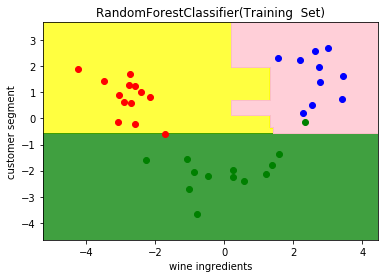

In [72]:
# visualization of train data
visualization(x,y,classifier)

In [73]:
print('Test Accuracy :',accuracy_score(y,prediction)*100)

Test Accuracy : 94.44444444444444
